**Загружаемые библиотеки и модули**
---
---


**Загрузка из requirements.txt (опционально, для выполнения раскомментировать нижестояющую строку кода)**

Файл должен находиться в той же директории, что и файл .ipynb.
В ссылке для скачиваня доступны два файла requirements.txt:
- В папке "Requirements" - библиотеки и модули, установленные в процессе разработки;
- В папке "Requirements (все библиотеки среды)" - все библиотеки и модули, установленные в среде разработки.

При установке библиотек из файла установка этих же библиотек с помощью "!pip install" не требуется.

In [ ]:
#!pip install -r requirements.txt

Библиотеки и модули, установленные в процессе разработки:

In [ ]:
!pip install ipykernel

In [ ]:
!pip install kagglehub

In [ ]:
!pip install tensorflow

In [ ]:
!pip install spacy

In [ ]:
!python -m spacy download en_core_web_sm

In [ ]:
!pip install wordcloud

In [ ]:
!pip install keras_tuner

In [ ]:
!pip install ipywidgets

In [ ]:
!pip install pandas

In [ ]:
!pip install seaborn

In [ ]:
!pip install scikit-learn

In [ ]:
!pip install matplotlib

**Для главы 2.1 Описание и анализ данных**
---
---


In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("abdallahwagih/emotion-dataset")

print("Path to dataset files:", path)

100%|██████████| 213k/213k [00:00<00:00, 20.1MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/abdallahwagih/emotion-dataset/versions/1


In [ ]:
import numpy as np
import pandas as pd
import os
import tensorflow as tf

import random

In [ ]:
# Установка фиксированных seed-значений
SEED = 42
os.environ['PYTHONHASHSEED'] = str(SEED)
random.seed(SEED)
np.random.seed(SEED)
tf.random.set_seed(SEED)

In [ ]:
import spacy
# библиотека для анализа текста

***Библиотеки для визуализации***

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

In [ ]:
#возвращает список имен всех файлов и папок, которые находятся внутри указанной директории path.
for file in os.listdir(path):
    print(file)

Emotion_classify_Data.csv


In [ ]:
data = pd.read_csv(os.path.join(path, 'Emotion_classify_Data.csv'))
data

,Comment,Emotion
0,i seriously hate one subject to death but now ...,fear
1,im so full of life i feel appalled,anger
2,i sit here to write i start to dig out my feel...,fear
3,ive been really angry with r and i feel like a...,joy
4,i feel suspicious if there is no one outside l...,fear
...,...,...
5932,i begun to feel distressed for you,fear
5933,i left feeling annoyed and angry thinking that...,anger
5934,i were to ever get married i d have everything...,joy
5935,i feel reluctant in applying there because i w...,fear


1. Проверяем  missing values:

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5937 entries, 0 to 5936
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Comment  5937 non-null   object
 1   Emotion  5937 non-null   object
dtypes: object(2)
memory usage: 92.9+ KB


2. Проверяем повторяющиеся ряды (duplicate rows):

In [ ]:
duplicate_rows = data.duplicated()
print("Number of duplicate rows:", duplicate_rows.sum())

Number of duplicate rows: 0


In [ ]:
data[duplicate_rows]

,Comment,Emotion


3. Посчитаем количество различных эмоций в данных:

In [ ]:
data['Emotion'].value_counts()

,count
Emotion,
anger,2000
joy,2000
fear,1937


4. Визуализация распределение эмоций (Emotion Distribution):

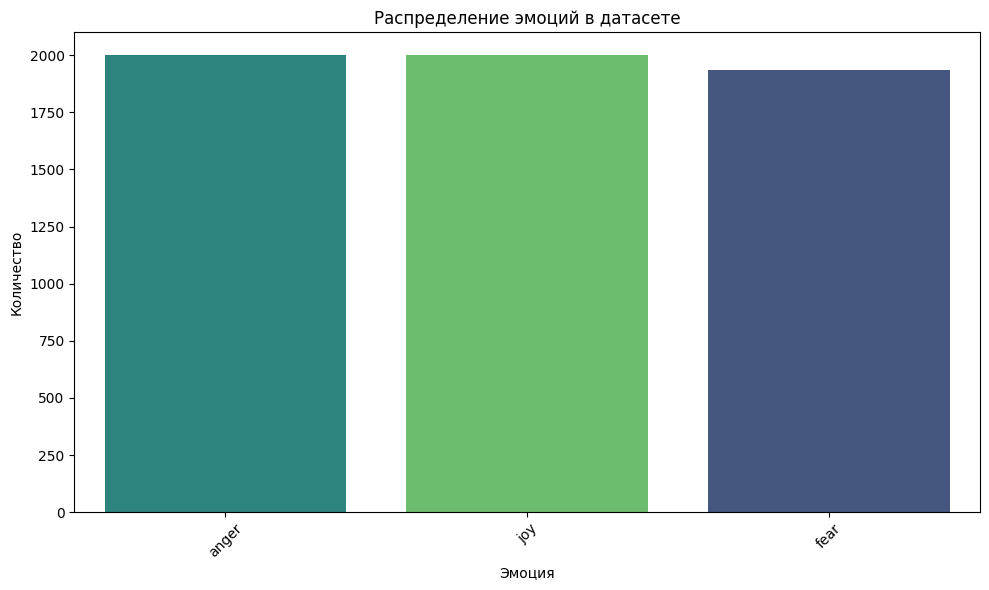

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='Emotion', hue ='Emotion', order=data['Emotion'].value_counts().index,palette='viridis',legend=False)
plt.title('Распределение эмоций в датасете')
plt.xlabel('Эмоция')
plt.ylabel('Количество')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

5. Облако слов (Word Cloud) для каждой эмоции:


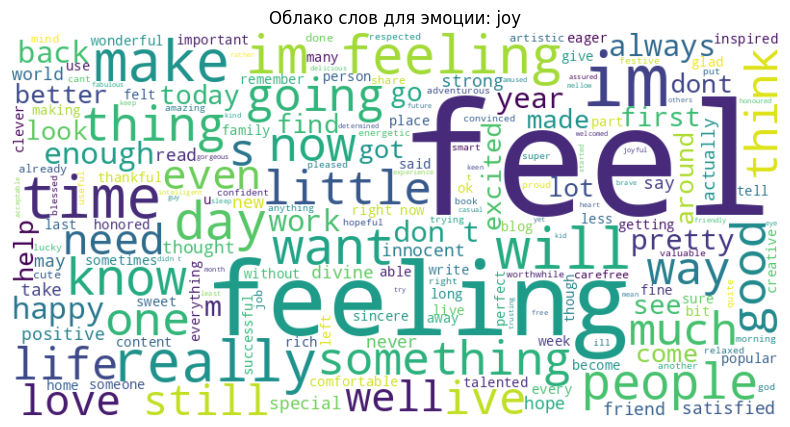

In [ ]:
#  Облако слов только для "joy"
text_joy = " ".join(data[data['Emotion'] == 'joy']['Comment'])

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_joy)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Облако слов для эмоции: joy')
plt.show()

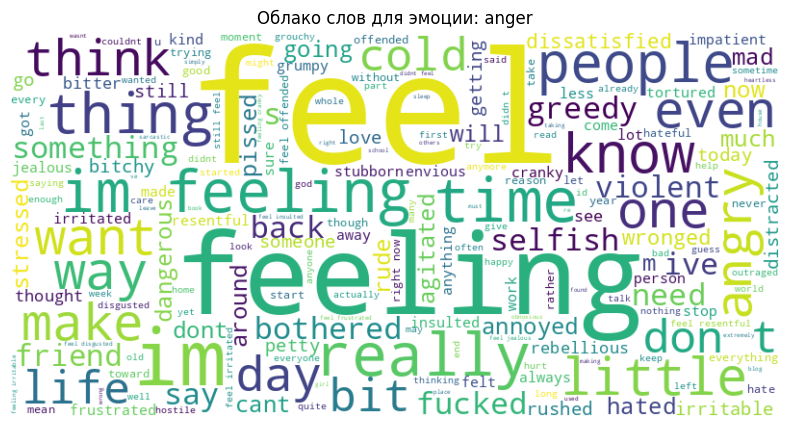

In [ ]:
#  Облако слов только для "anger"
text_joy = " ".join(data[data['Emotion'] == 'anger']['Comment'])

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_joy)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Облако слов для эмоции: anger')
plt.show()

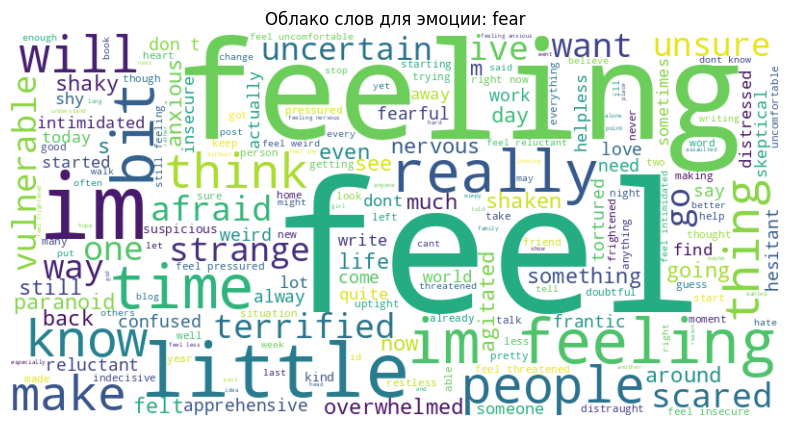

In [ ]:
#  Облако слов только для "fear"
text_joy = " ".join(data[data['Emotion'] == 'fear']['Comment'])

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_joy)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Облако слов для эмоции: fear')
plt.show()

6. Визуализация длины комметариев по эмоциям

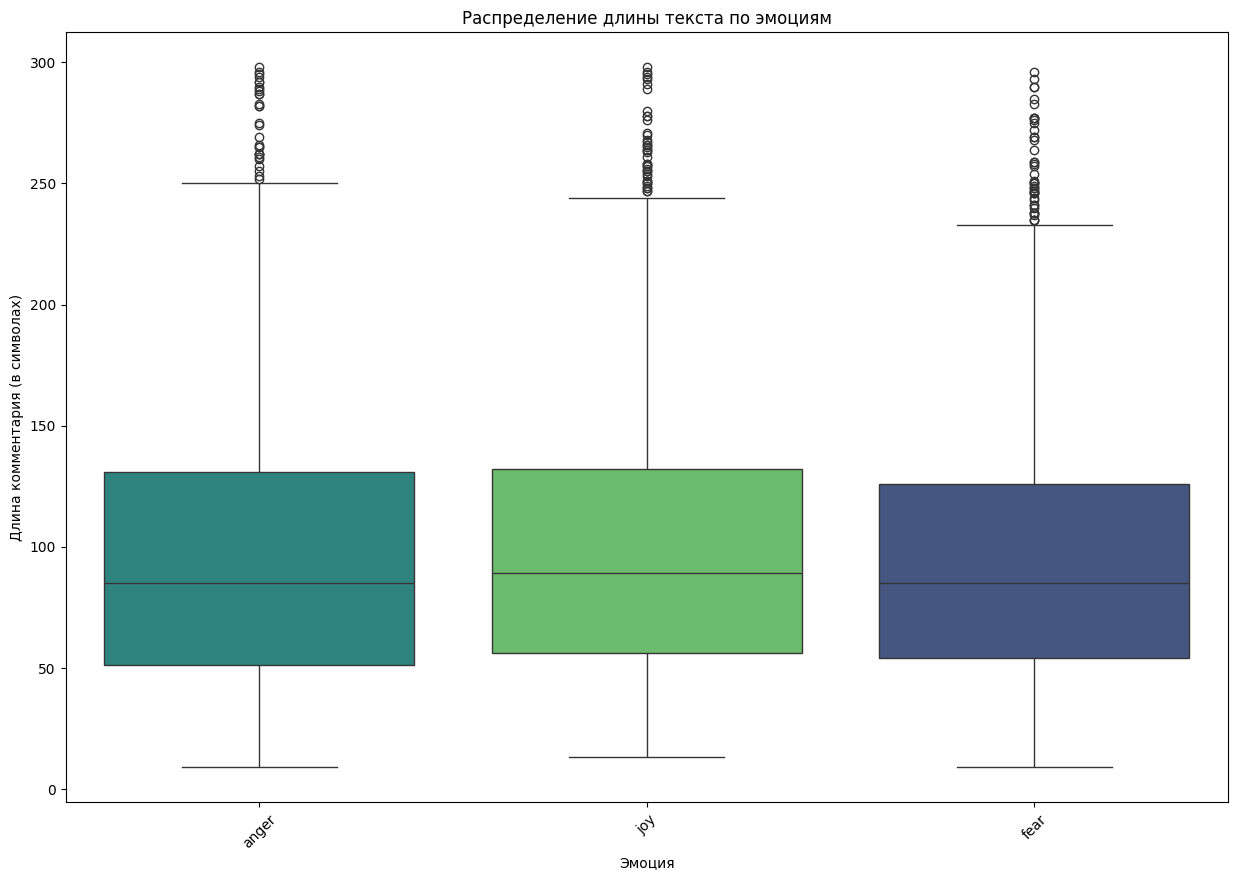

In [ ]:
data['Text_Length'] = data['Comment'].apply(len)

plt.figure(figsize=(15, 10))
sns.boxplot(data=data, x='Emotion', y='Text_Length', hue = 'Emotion', order=data['Emotion'].value_counts().index, palette='viridis')
plt.title('Распределение длины текста по эмоциям')
plt.xlabel('Эмоция')
plt.ylabel('Длина комментария (в символах)')
plt.xticks(rotation=45)
plt.show()

In [ ]:
data['Text_Length'].describe()

,Text_Length
count,5937.000000
mean,97.425973
std,56.196202
min,9.000000
25%,54.000000
50%,86.000000
75%,130.000000
max,298.000000


**Для главы 2.2 Подготовка данных**
---
---






### Подготовка данных для классификации с использыванием библиотеки SpaCY

In [ ]:
# Загрузка модели
nlp = spacy.load("en_core_web_sm")

***1. Лемматизация, удаление стоп-слов и пунктуации***


In [ ]:
from tqdm import tqdm  # для прогресс-бара, опционально
tqdm.pandas()

In [ ]:
def preprocess_spacy(text):
    doc = nlp(text.lower())  # приведение к нижнему регистру
    tokens = [
        token.lemma_ for token in doc
        if not token.is_stop and not token.is_punct and not token.is_space
    ]
    return " ".join(tokens)

# Применим ко всем комментариям
data['Cleaned_Comment'] = data['Comment'].progress_apply(preprocess_spacy) #.progress_apply - визуализирует прогресс-бар(окно загрузки), ф-я preprocess_spacy - создает столбец clean comment (данные для нее)

100%|██████████| 5937/5937 [01:05<00:00, 90.66it/s] 


In [ ]:
data

,Comment,Emotion,Text_Length,Cleaned_Comment
0,i seriously hate one subject to death but now ...,fear,73,seriously hate subject death feel reluctant drop
1,im so full of life i feel appalled,anger,34,m life feel appalled
2,i sit here to write i start to dig out my feel...,fear,131,sit write start dig feeling think afraid accep...
3,ive been really angry with r and i feel like a...,joy,89,ve angry r feel like idiot trust place
4,i feel suspicious if there is no one outside l...,fear,87,feel suspicious outside like rapture happen
...,...,...,...,...
5932,i begun to feel distressed for you,fear,34,begin feel distressed
5933,i left feeling annoyed and angry thinking that...,anger,83,leave feel annoyed angry thinking center stupi...
5934,i were to ever get married i d have everything...,joy,218,marry d ready offer ve get club perfect good l...
5935,i feel reluctant in applying there because i w...,fear,111,feel reluctant apply want able find company kn...


***2. Токенизация и преобразование текста в числовой формат***

Для токенизации и преобразование текста в числовой формат используются Tokenizer и pad_sequences из Keras

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
# 1. Инициализируем токенизатор
tokenizer = Tokenizer()
tokenizer.fit_on_texts(data['Cleaned_Comment'])

# 2. Преобразуем текст в последовательности чисел
sequences = tokenizer.texts_to_sequences(data['Cleaned_Comment'])

# 3. Применим паддинг (дополнение до одинаковой длины)
padded_sequences = pad_sequences(sequences, padding='post')  # 'post' — добавляет нули в конец


In [ ]:
tokenizer

In [ ]:
sequences

[[450, 43, 879, 692, 1, 103, 742],
 [2, 21, 1, 965],
 [95, 36, 24, 1454, 5, 11, 63, 233, 880],
 [15, 47, 1096, 1, 3, 966, 170, 88],
 [1, 277, 451, 3, 3206, 80],
 [1, 138, 3207, 9, 58, 23, 496, 693, 694, 9],
 [38, 203, 40, 2176, 16, 80, 743],
 [411, 290, 1097, 5, 47, 1455, 527],
 [1, 19, 160, 1240, 27, 18],
 [1, 3, 15, 1456, 528, 21, 107],
 [1, 19, 3, 3208, 3209, 2177, 14, 6, 3210, 566, 2178],
 [1, 24, 4, 9, 278, 161, 1457, 235, 1740, 279, 814, 41],
 [1241, 743],
 [32, 1, 266, 41, 15, 1098, 1458, 280, 1, 388, 171, 83, 16, 9, 433],
 [30, 52, 1, 76, 3],
 [1, 3, 43],
 [4,
  6,
  36,
  1459,
  10,
  967,
  1,
  39,
  643,
  1096,
  281,
  497,
  79,
  744,
  107,
  45,
  3211,
  323,
  159],
 [1, 291, 452, 40, 204, 1, 498, 204, 38, 9, 68, 1741],
 [59, 1, 117, 7, 644, 476, 7, 362, 604, 434],
 [1, 3, 2179, 11, 181, 324, 251],
 [69, 881, 77, 71, 252, 6, 2, 1, 108, 165, 363, 170],
 [1, 67, 35, 1242],
 [95, 325, 205, 644, 1, 282, 5, 227, 5, 2180, 146],
 [1, 10, 150, 8, 172, 1243, 2181, 338, 882,

In [ ]:
padded_sequences

array([[ 450,   43,  879, ...,    0,    0,    0],
       [   2,   21,    1, ...,    0,    0,    0],
       [  95,   36,   24, ...,    0,    0,    0],
       ...,
       [ 908,   53,  356, ...,    0,    0,    0],
       [   1,  103, 1358, ...,    0,    0,    0],
       [   9, 1007,    1, ...,    0,    0,    0]], dtype=int32)

In [ ]:
len(padded_sequences[0])

33

***3. Кодирование целевых меток (эмоций)***

In [ ]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

In [ ]:
# 1. Преобразуем текстовые метки в числа
label_encoder = LabelEncoder()
integer_labels = label_encoder.fit_transform(data['Emotion'])

# 2. Преобразуем числовые метки в one-hot формат
one_hot_labels = to_categorical(integer_labels)
data['Label'] = integer_labels


In [ ]:
integer_labels

array([1, 0, 1, ..., 2, 1, 0])

In [ ]:
# Получим имена классов
class_names = label_encoder.classes_

# Преобразуем one-hot в DataFrame
one_hot_df = pd.DataFrame(one_hot_labels, columns=[f"Emotion_{cls}" for cls in class_names])

# Объединим с data по индексу
data = pd.concat([data, one_hot_df], axis=1)

In [ ]:
data

,Comment,Emotion,Text_Length,Cleaned_Comment,Label,Emotion_anger,Emotion_fear,Emotion_joy
0,i seriously hate one subject to death but now ...,fear,73,seriously hate subject death feel reluctant drop,1,0.0,1.0,0.0
1,im so full of life i feel appalled,anger,34,m life feel appalled,0,1.0,0.0,0.0
2,i sit here to write i start to dig out my feel...,fear,131,sit write start dig feeling think afraid accep...,1,0.0,1.0,0.0
3,ive been really angry with r and i feel like a...,joy,89,ve angry r feel like idiot trust place,2,0.0,0.0,1.0
4,i feel suspicious if there is no one outside l...,fear,87,feel suspicious outside like rapture happen,1,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...
5932,i begun to feel distressed for you,fear,34,begin feel distressed,1,0.0,1.0,0.0
5933,i left feeling annoyed and angry thinking that...,anger,83,leave feel annoyed angry thinking center stupi...,0,1.0,0.0,0.0
5934,i were to ever get married i d have everything...,joy,218,marry d ready offer ve get club perfect good l...,2,0.0,0.0,1.0
5935,i feel reluctant in applying there because i w...,fear,111,feel reluctant apply want able find company kn...,1,0.0,1.0,0.0


- X — это padded_sequences

- y — это one_hot_labels или data[['Emotion_anger', 'Emotion_fear', 'Emotion_joy']]

In [ ]:
padded_sequences

array([[ 450,   43,  879, ...,    0,    0,    0],
       [   2,   21,    1, ...,    0,    0,    0],
       [  95,   36,   24, ...,    0,    0,    0],
       ...,
       [ 908,   53,  356, ...,    0,    0,    0],
       [   1,  103, 1358, ...,    0,    0,    0],
       [   9, 1007,    1, ...,    0,    0,    0]], dtype=int32)

In [ ]:
#Массив с текстами в числовом виде, одинаковой длины (т.к. при токенизации (преобразовании в числовой формат) получаем одинаковую длинну каждой фразы - 33, если длина меншь - заполняется нулями, это видну на матрице выше)(готов к модели)
X = padded_sequences
print("X shape:", X.shape)

X shape: (5937, 33)


In [ ]:
#One-hot метки (цели для классификации)
y = one_hot_labels
print("y shape:", y.shape)
print("Количество классов:", y.shape[1])

y shape: (5937, 3)
Количество классов: 3


In [ ]:
#Хранит словарь слов — понадобится позже для преобразования новых данных
print("Vocabulary size:", len(tokenizer.word_index) + 1)

Vocabulary size: 6963


In [ ]:
#словарь всех слов, найденных токенизатором
tokenizer.word_index

{'feel': 1,
 'm': 2,
 'like': 3,
 'not': 4,
 'feeling': 5,
 'know': 6,
 't': 7,
 'time': 8,
 'want': 9,
 'little': 10,
 'think': 11,
 's': 12,
 'go': 13,
 'people': 14,
 've': 15,
 'thing': 16,
 'day': 17,
 'way': 18,
 'bit': 19,
 'get': 20,
 'life': 21,
 'need': 22,
 'love': 23,
 'start': 24,
 'come': 25,
 'work': 26,
 'good': 27,
 'don': 28,
 'make': 29,
 'try': 30,
 'leave': 31,
 'find': 32,
 'look': 33,
 'right': 34,
 'help': 35,
 'write': 36,
 'pretty': 37,
 'friend': 38,
 'today': 39,
 'tell': 40,
 'year': 41,
 'say': 42,
 'hate': 43,
 'lot': 44,
 'long': 45,
 'agitated': 46,
 'angry': 47,
 'away': 48,
 'read': 49,
 'sure': 50,
 'happy': 51,
 'talk': 52,
 'd': 53,
 'strange': 54,
 'actually': 55,
 'person': 56,
 'world': 57,
 'kind': 58,
 'remember': 59,
 'anxious': 60,
 'nervous': 61,
 'take': 62,
 'afraid': 63,
 'wrong': 64,
 'cold': 65,
 'home': 66,
 'well': 67,
 'stop': 68,
 'hope': 69,
 'ask': 70,
 'let': 71,
 'walk': 72,
 'week': 73,
 'fuck': 74,
 'shake': 75,
 'irritable':

**Для главы 2.4.Создание и обучение моделей**
---
---

***4. Разделение данных на train и test***

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X,               # входные данные (padded_sequences)
    y,               # целевые метки (one-hot)
    test_size=0.2,   # 20% на тест
    random_state=42, # фиксируем результат для воспроизводимости
    stratify=y       # чтобы классы равномерно распределялись
)
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (4749, 33)
X_test shape: (1188, 33)
y_train shape: (4749, 3)
y_test shape: (1188, 3)


***можно зафиксировать random seed  для моделей (в начале seed)с LSTM, чтобы результаты были максимально воспроизводимыми. Но тут есть нюанс: LSTM и другие слои Keras используют внутренние генераторы случайных чисел, и их поведение также зависит от NumPy, Python и самого TensorFlow.***

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam

In [ ]:
#длина каждой фразы
X.shape[1]

33

In [ ]:
tokenizer.word_index

{'feel': 1,
 'm': 2,
 'like': 3,
 'not': 4,
 'feeling': 5,
 'know': 6,
 't': 7,
 'time': 8,
 'want': 9,
 'little': 10,
 'think': 11,
 's': 12,
 'go': 13,
 'people': 14,
 've': 15,
 'thing': 16,
 'day': 17,
 'way': 18,
 'bit': 19,
 'get': 20,
 'life': 21,
 'need': 22,
 'love': 23,
 'start': 24,
 'come': 25,
 'work': 26,
 'good': 27,
 'don': 28,
 'make': 29,
 'try': 30,
 'leave': 31,
 'find': 32,
 'look': 33,
 'right': 34,
 'help': 35,
 'write': 36,
 'pretty': 37,
 'friend': 38,
 'today': 39,
 'tell': 40,
 'year': 41,
 'say': 42,
 'hate': 43,
 'lot': 44,
 'long': 45,
 'agitated': 46,
 'angry': 47,
 'away': 48,
 'read': 49,
 'sure': 50,
 'happy': 51,
 'talk': 52,
 'd': 53,
 'strange': 54,
 'actually': 55,
 'person': 56,
 'world': 57,
 'kind': 58,
 'remember': 59,
 'anxious': 60,
 'nervous': 61,
 'take': 62,
 'afraid': 63,
 'wrong': 64,
 'cold': 65,
 'home': 66,
 'well': 67,
 'stop': 68,
 'hope': 69,
 'ask': 70,
 'let': 71,
 'walk': 72,
 'week': 73,
 'fuck': 74,
 'shake': 75,
 'irritable':

In [ ]:
len(tokenizer.word_index)

6962

In [ ]:
y.shape[1] #3 эмоции

3

***МОДЕЛЬ НЕЙРОННОЙ СЕТИ***

In [ ]:
# Параметры (для моделей)
vocab_size = len(tokenizer.word_index) + 1
input_length = X.shape[1]
embedding_dim = 100
num_classes = y.shape[1]

# Модель нейронной сети Sequential (последовательный тип связей между слоями)
model = Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=input_length)) #Входной слой
model.add(LSTM(64, return_sequences=False)) # первый слой (кол-во нейронов - 64)
model.add(Dropout(0.5)) # половину нейронов отбрасываем (для мнижения переобучения модели)
model.add(Dense(32, activation='relu'))# второй слой (кол-во нейронов - 32) (функция активации activation='relu') "расставляет вероятности"
model.add(Dense(num_classes, activation='softmax'))# выходной слой (функция активации activation='softmax')

# Укажем конфигурацию обучения (оптимизатор, функция потерь, метрики)
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


# Обучение
history = model.fit(
    X_train, y_train,
    epochs=10,
    batch_size=32,
    validation_split=0.1,  # 10% от обучающих данных будет использовано как валидация - 10 % для тестирования внутри модели
)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/10
134/134 ━━━━━━━━━━━━━━━━━━━━ 9s 42ms/step - accuracy: 0.3454 - loss: 1.0995 - val_accuracy: 0.3326 - val_loss: 1.0984
Epoch 2/10
134/134 ━━━━━━━━━━━━━━━━━━━━ 9s 31ms/step - accuracy: 0.3345 - loss: 1.1000 - val_accuracy: 0.3347 - val_loss: 1.0980
Epoch 3/10
134/134 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - accuracy: 0.3383 - loss: 1.0993 - val_accuracy: 0.3053 - val_loss: 1.0994
Epoch 4/10
134/134 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - accuracy: 0.3327 - loss: 1.0979 - val_accuracy: 0.5642 - val_loss: 1.0672
Epoch 5/10
134/134 ━━━━━━━━━━━━━━━━━━━━ 7s 39ms/step - accuracy: 0.5749 - loss: 0.8389 - val_accuracy: 0.7095 - val_loss: 0.6283
Epoch 6/10
134/134 ━━━━━━━━━━━━━━━━━━━━ 9s 31ms/step - accuracy: 0.6759 - loss: 0.6020 - val_accuracy: 0.8653 - val_loss: 0.4468
Epoch 7/10
134/134 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - accuracy: 0.9042 - loss: 0.3085 - val_accuracy: 0.9095 - val_loss: 0.3735
Epoch 8/10
134/134 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - accuracy: 0.9567 - loss: 0.1714 - val_accu

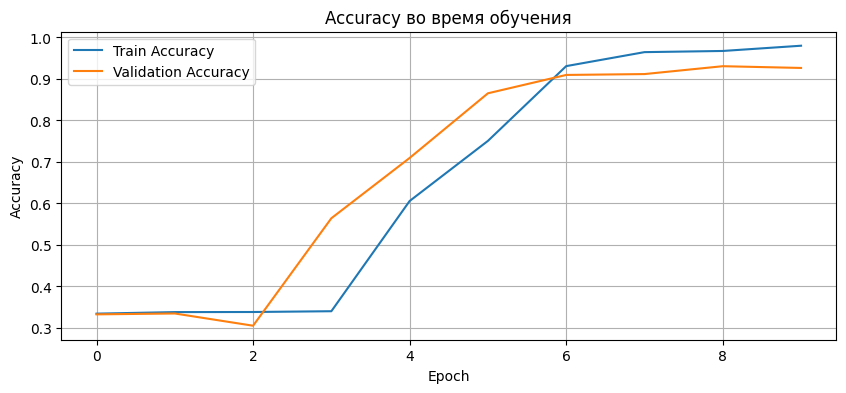

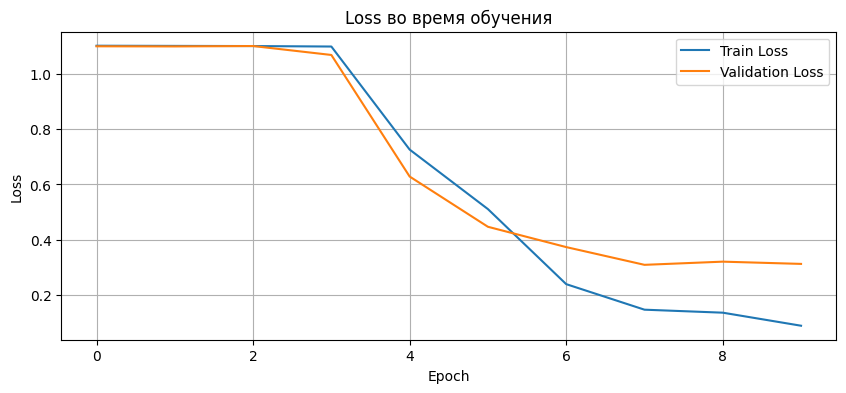

In [ ]:
# Точность
plt.figure(figsize=(10, 4))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy во время обучения')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# Функция потерь
plt.figure(figsize=(10, 4))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss во время обучения')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()


**Для главы 2.5 Тестирование модели**
---
---

In [ ]:
# Получим вероятности
y_pred_proba = model.predict(X_test)

# Преобразуем вероятности в метки классов
y_pred = np.argmax(y_pred_proba, axis=1)

# Истинные метки (тоже в виде индексов)
y_true = np.argmax(y_test, axis=1)

38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step


<Figure size 600x600 with 0 Axes>

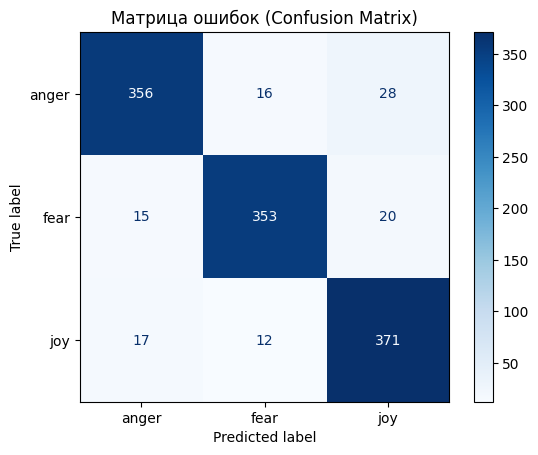

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Построим матрицу
cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_encoder.classes_)

plt.figure(figsize=(6, 6))
disp.plot(cmap='Blues', values_format='d')
plt.title("Матрица ошибок (Confusion Matrix)")
plt.show()

#### Вывод:

- В целом модель работает очень хорошо, с точной классификацией в большинстве случаев.

- Наибольшая путаница наблюдается между anger и joy, а также между fear и другими эмоциями, что может быть связано с лингвистической схожестью или пересечением выражений эмоций.

- Это также подтверждает, что оптимизация гиперпараметров может помочь уменьшить количество таких ошибок и улучшить различение схожих по контексту эмоций.



In [ ]:
from sklearn.metrics import classification_report

# Отчёт по классам
report = classification_report(y_true, y_pred, target_names=label_encoder.classes_)
print("Классификационный отчёт:\n")
print(report)

Классификационный отчёт:

              precision    recall  f1-score   support

       anger       0.92      0.89      0.90       400
        fear       0.93      0.91      0.92       388
         joy       0.89      0.93      0.91       400

    accuracy                           0.91      1188
   macro avg       0.91      0.91      0.91      1188
weighted avg       0.91      0.91      0.91      1188



**Для главы 2.5 Улучшение моделей**
---
---

In [ ]:
import keras_tuner as kt

In [ ]:
def build_model(hp):
    model = Sequential()

    model.add(Embedding(
        input_dim=vocab_size,
        output_dim=100,  # фиксированное значение
        input_length=input_length
    ))
    model.add(LSTM(
        units=hp.Int('lstm_units', min_value=32, max_value=128, step=32),
        return_sequences=False
    ))

    model.add(Dropout(
        rate=hp.Float('dropout_rate', min_value=0.2, max_value=0.5, step=0.1)
    ))

    model.add(Dense(
        units=hp.Int('dense_units', min_value=16, max_value=64, step=16),
        activation='relu'
    ))

    model.add(Dense(num_classes, activation='softmax'))

    model.compile(
        optimizer=Adam(
            learning_rate=hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])
        ),
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )

    return model

In [ ]:
# Построем модель hyperband для улучшения гиперпарамеров
tuner = kt.Hyperband(
    build_model,
    objective='val_accuracy',
    max_epochs=20,# ← максимум эпох для одной конфигурации
    factor=3,# ← как быстро отбрасываются плохие модели
    directory='my_tuner_dir', #!!!При каждом запуске нужно менять директорию (добавлять единицу например)!!!
    project_name='lstm_hyperband'
)

In [ ]:
#поиск наилучших парамеров
tuner.search(X_train, y_train,
             epochs=20,
             validation_split=0.1,
             batch_size=32)

Trial 30 Complete [00h 00m 24s]
val_accuracy: 0.8021052479743958

Best val_accuracy So Far: 0.9389473795890808
Total elapsed time: 00h 05m 02s


In [ ]:
#выводим нилучшие  hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

print(f"""
Best LSTM units: {best_hps.get('lstm_units')}
Best Dropout rate: {best_hps.get('dropout_rate')}
Best Dense units: {best_hps.get('dense_units')}
Best Learning rate: {best_hps.get('learning_rate')}
""")


Best LSTM units: 128
Best Dropout rate: 0.30000000000000004
Best Dense units: 64
Best Learning rate: 0.001



In [ ]:
# тренировка лучшей модели
best_model = tuner.hypermodel.build(best_hps)

history = best_model.fit(
    X_train, y_train,
    epochs=10,
    validation_split=0.1,
    batch_size=32
)

Epoch 1/10
134/134 [==============================] - 2s 9ms/step - loss: 1.1001 - accuracy: 0.3381 - val_loss: 1.0998 - val_accuracy: 0.3347
Epoch 2/10
134/134 [==============================] - 1s 7ms/step - loss: 1.0998 - accuracy: 0.3231 - val_loss: 1.0984 - val_accuracy: 0.3347
Epoch 3/10
134/134 [==============================] - 1s 8ms/step - loss: 1.0992 - accuracy: 0.3294 - val_loss: 1.0987 - val_accuracy: 0.2989
Epoch 4/10
134/134 [==============================] - 1s 8ms/step - loss: 1.0992 - accuracy: 0.3369 - val_loss: 1.0988 - val_accuracy: 0.3347
Epoch 5/10
134/134 [==============================] - 1s 8ms/step - loss: 0.8226 - accuracy: 0.5440 - val_loss: 0.6461 - val_accuracy: 0.6526
Epoch 6/10
134/134 [==============================] - 1s 8ms/step - loss: 0.4773 - accuracy: 0.7789 - val_loss: 0.3445 - val_accuracy: 0.8968
Epoch 7/10
134/134 [==============================] - 1s 8ms/step - loss: 0.2416 - accuracy: 0.9350 - val_loss: 0.2807 - val_accuracy: 0.9347
Epoch 

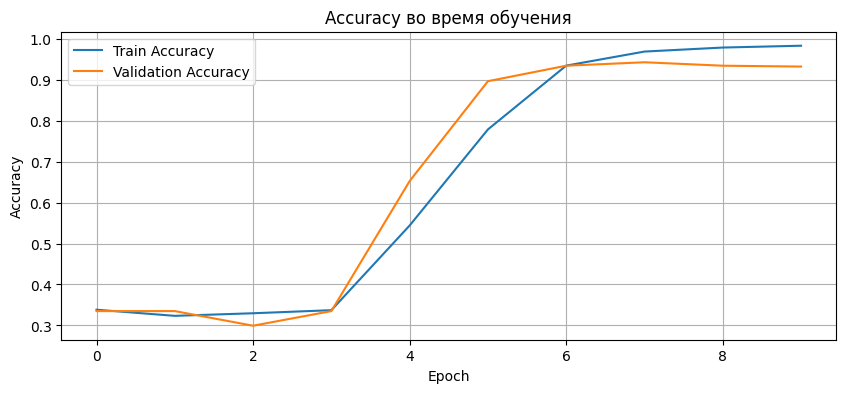

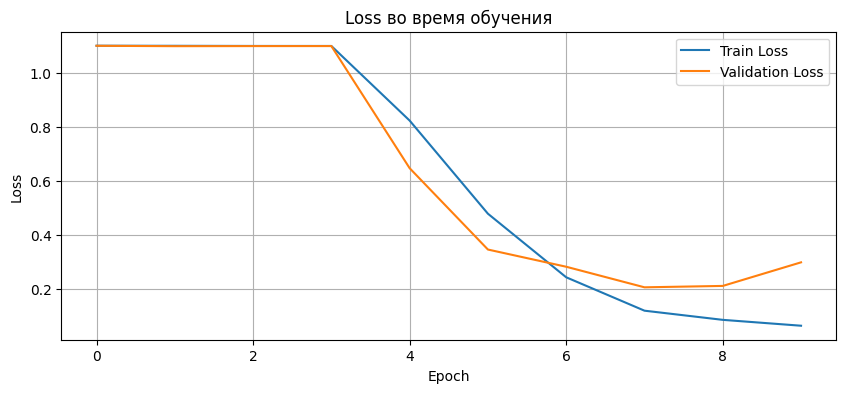

In [ ]:
# Точность
plt.figure(figsize=(10, 4))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy во время обучения')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# Функция потерь
plt.figure(figsize=(10, 4))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss во время обучения')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
# Получим вероятности
y_pred_proba = best_model.predict(X_test)

# Преобразуем вероятности в метки классов
y_pred = np.argmax(y_pred_proba, axis=1)

# Истинные метки (тоже в виде индексов)
y_true = np.argmax(y_test, axis=1)

38/38 [==============================] - 0s 7ms/step


<Figure size 600x600 with 0 Axes>

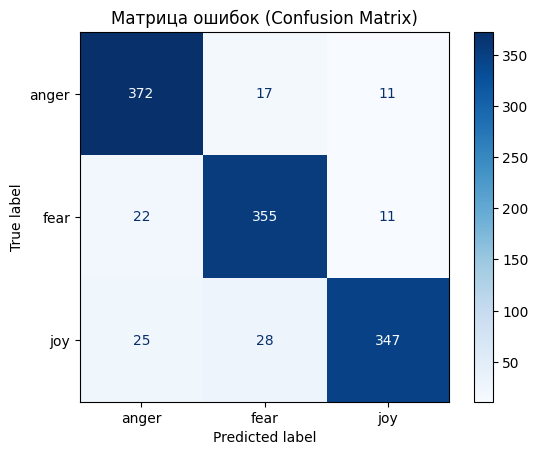

In [ ]:
# Построим матрицу
cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_encoder.classes_)

plt.figure(figsize=(6, 6))
disp.plot(cmap='Blues', values_format='d')
plt.title("Матрица ошибок (Confusion Matrix)")
plt.show()

In [ ]:
# Отчёт по классам
report = classification_report(y_true, y_pred, target_names=label_encoder.classes_)
print("Классификационный отчёт:\n")
print(report)

Классификационный отчёт:

              precision    recall  f1-score   support

       anger       0.89      0.93      0.91       400
        fear       0.89      0.91      0.90       388
         joy       0.94      0.87      0.90       400

    accuracy                           0.90      1188
   macro avg       0.91      0.90      0.90      1188
weighted avg       0.91      0.90      0.90      1188



### Повторный тюнинг

- важно изменить project_name или directory
-
Keras Tuner сохраняет результаты тюнинга в папке, которую ты указываешь.
Если оставить те же значения, он подгрузит старые результаты и не начнёт тюнинг заново, даже если factor другой.

In [ ]:
# построим модель
tuner_1 = kt.Hyperband(
    build_model,
    objective='val_accuracy',
    max_epochs=20,
    factor=2,  # ← теперь подбор будет более точным, но дольше
    directory='my_tuner_dir',
    project_name='lstm_hyperband_factor2'  # ← изменили имя проекта
)

In [ ]:
#поиск
tuner_1.search(X_train, y_train,
             epochs=20,
             validation_split=0.1,
             batch_size=32)

Trial 92 Complete [00h 00m 22s]
val_accuracy: 0.8021052479743958

Best val_accuracy So Far: 0.9494736790657043
Total elapsed time: 00h 10m 55s


In [ ]:
# нилучшие  hyperparameters
best_hps = tuner_1.get_best_hyperparameters(num_trials=1) [0]

print(f"""
Best LSTM units: {best_hps.get('lstm_units')}
Best Dropout rate: {best_hps.get('dropout_rate')}
Best Dense units: {best_hps.get('dense_units')}
Best Learning rate: {best_hps.get ('learning_rate')}
""")


Best LSTM units: 64
Best Dropout rate: 0.4
Best Dense units: 48
Best Learning rate: 0.001



In [ ]:
# тренировка лучшей модели
best_model_1 = tuner_1.hypermodel.build(best_hps)

history_1 = best_model_1.fit(
    X_train, y_train,
    epochs=10,
    validation_split=0.1,
    batch_size=32
)

Epoch 1/10
134/134 [==============================] - 3s 12ms/step - loss: 1.1001 - accuracy: 0.3329 - val_loss: 1.0992 - val_accuracy: 0.3347
Epoch 2/10
134/134 [==============================] - 1s 7ms/step - loss: 1.0997 - accuracy: 0.3411 - val_loss: 1.0997 - val_accuracy: 0.2989
Epoch 3/10
134/134 [==============================] - 1s 7ms/step - loss: 1.0996 - accuracy: 0.3315 - val_loss: 1.1010 - val_accuracy: 0.2989
Epoch 4/10
134/134 [==============================] - 1s 7ms/step - loss: 1.0990 - accuracy: 0.3308 - val_loss: 1.0979 - val_accuracy: 0.3663
Epoch 5/10
134/134 [==============================] - 1s 7ms/step - loss: 0.7942 - accuracy: 0.5702 - val_loss: 0.5999 - val_accuracy: 0.8084
Epoch 6/10
134/134 [==============================] - 1s 7ms/step - loss: 0.3572 - accuracy: 0.8772 - val_loss: 0.2711 - val_accuracy: 0.9305
Epoch 7/10
134/134 [==============================] - 1s 7ms/step - loss: 0.1527 - accuracy: 0.9630 - val_loss: 0.3044 - val_accuracy: 0.9095
Epoch

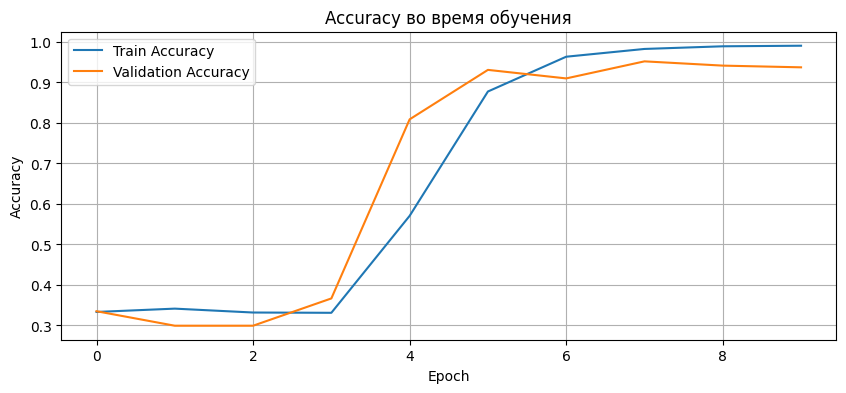

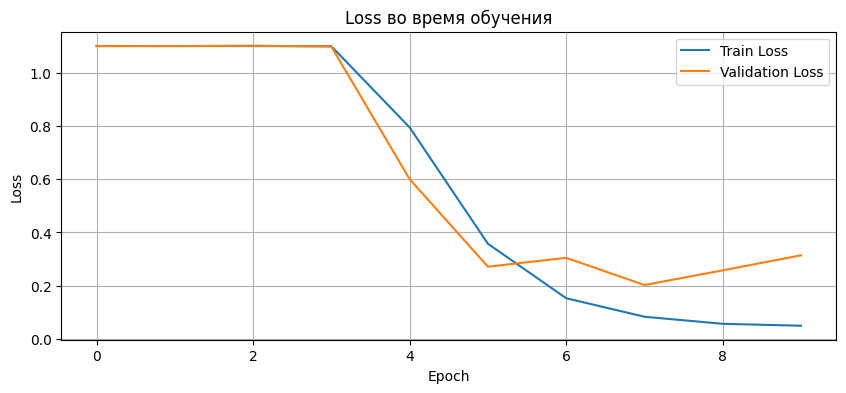

In [ ]:
# Точность
plt.figure(figsize=(10, 4))
plt.plot(history_1.history['accuracy'], label='Train Accuracy')
plt.plot(history_1.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy во время обучения')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# Функция потерь
plt.figure(figsize=(10, 4))
plt.plot(history_1.history['loss'], label='Train Loss')
plt.plot(history_1.history['val_loss'], label='Validation Loss')
plt.title('Loss во время обучения')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Получим вероятности
y_pred_proba = best_model_1.predict(X_test)

# Преобразуем вероятности в метки классов
y_pred = np.argmax(y_pred_proba, axis=1)

# Истинные метки (тоже в виде индексов)
y_true = np.argmax(y_test, axis=1)

38/38 [==============================] - 0s 5ms/step


<Figure size 600x600 with 0 Axes>

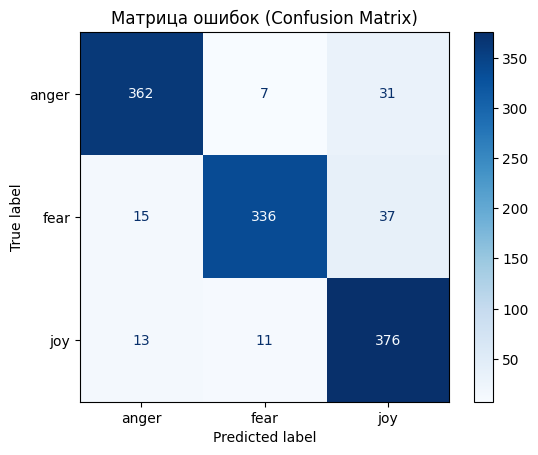

In [ ]:
# Построим матрицу
cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_encoder.classes_)

plt.figure(figsize=(6, 6))
disp.plot(cmap='Blues', values_format='d')
plt.title("Матрица ошибок (Confusion Matrix)")
plt.show()

In [ ]:
# Отчёт по классам
report = classification_report(y_true, y_pred, target_names=label_encoder.classes_)
print("Классификационный отчёт:\n")
print(report)

Классификационный отчёт:

              precision    recall  f1-score   support

       anger       0.93      0.91      0.92       400
        fear       0.95      0.87      0.91       388
         joy       0.85      0.94      0.89       400

    accuracy                           0.90      1188
   macro avg       0.91      0.90      0.90      1188
weighted avg       0.91      0.90      0.90      1188

